<a href="https://colab.research.google.com/github/smart-sangmin/self_learning_machine_learning_and_deep_learning/blob/main/8%EC%9E%A5%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC%20%EC%9C%84%ED%95%9C%20%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

In [3]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42, ) 

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

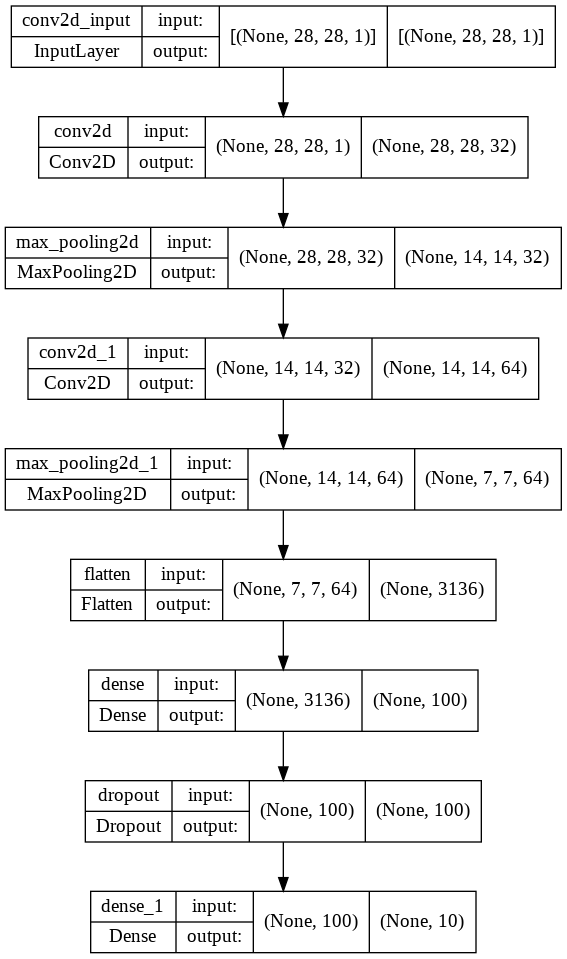

In [5]:
keras.utils.plot_model(model, show_shapes=True)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 69s 45ms/step - loss: 0.5056 - accuracy: 0.8195 - val_loss: 0.3300 - val_accuracy: 0.8796
Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3361 - accuracy: 0.8801 - val_loss: 0.2654 - val_accuracy: 0.8992
Epoch 3/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2884 - accuracy: 0.8956 - val_loss: 0.2557 - val_accuracy: 0.9048
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2604 - accuracy: 0.9054 - val_loss: 0.2371 - val_accuracy: 0.9135
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2358 - accuracy: 0.9137 - val_loss: 0.2325 - val_accuracy: 0.9150
Epoch 6/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2164 - accuracy: 0.9215 - val_loss: 0.2422 - val_accuracy: 0.9090
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2010 - accuracy: 0.9258 - val_loss: 0.2274 -

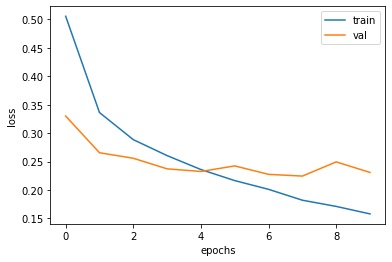

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2244 - accuracy: 0.9212


[0.22435598075389862, 0.9212499856948853]

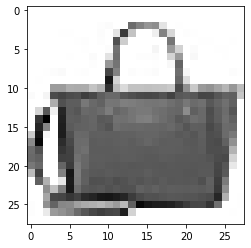

In [9]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.0872795e-16 2.5343269e-22 1.9060887e-16 2.7881417e-15 2.0559006e-16
  1.2961012e-16 6.1923704e-16 4.0571630e-19 1.0000000e+00 2.5108676e-21]]


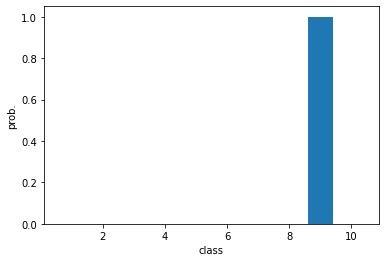

In [11]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [12]:
classes = ['티', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [13]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [14]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2455 - accuracy: 0.9200


[0.24545441567897797, 0.9200000166893005]

In [15]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [16]:
model.layers

In [17]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)  # weights[0] = weight, weights[1] = bias

(3, 3, 1, 32) (32,)


In [23]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.009543919 0.22694296


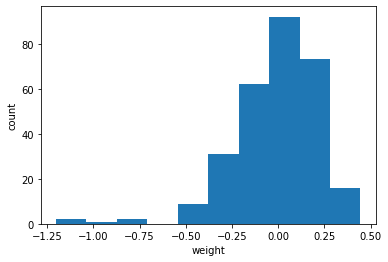

In [26]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

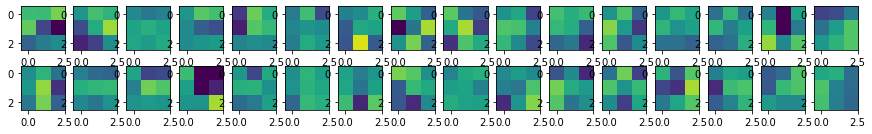

In [29]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
plt.show()

In [33]:
no_training_model = keras.Sequential()
no_training_model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
no_conv = no_training_model.layers[0]
print(no_conv.weights[0].shape)

(3, 3, 1, 32)


In [34]:
no_conv_weights= no_conv.weights[0].numpy()
print(no_conv_weights.mean(), no_conv_weights.std())

-0.0068943575 0.08232639


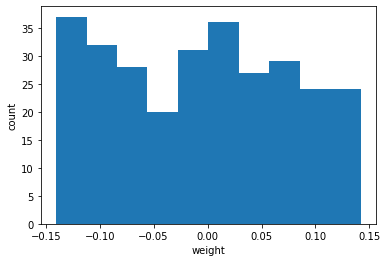

In [35]:
plt.hist(no_conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

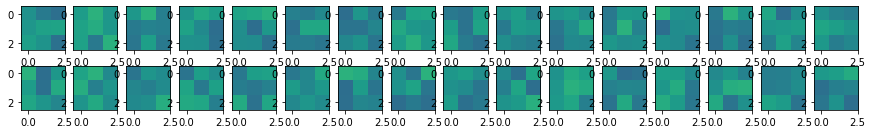

In [38]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
plt.show()

In [39]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [40]:
conv_acti = keras.Model(model.input, model.layers[0].output)

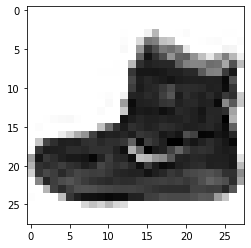

In [41]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [43]:
inputs = train_input[0:1].reshape(-1, 28, 28 ,1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


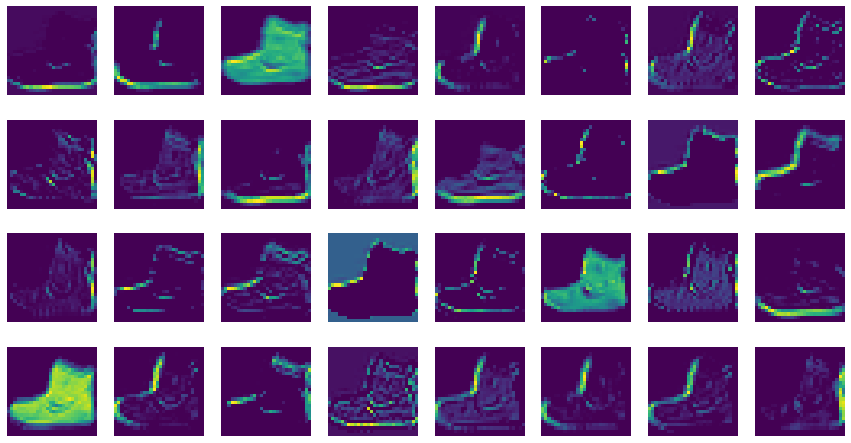

In [45]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [48]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [49]:
inputs = train_input[0:1].reshape(-1, 28, 28 ,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [50]:
print(feature_maps.shape)

(1, 14, 14, 64)


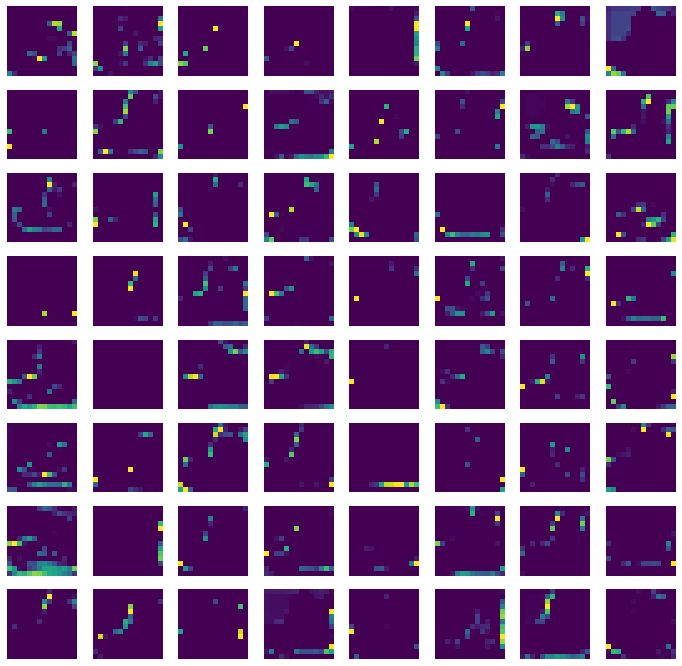

In [54]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()